In [1]:
import numpy as np

def getData(N, sigma):
    X = np.random.rand(N)  # Generate N random samples in (0, 1)
    Z = np.random.normal(0, np.sqrt(sigma), N)  # Generate N samples from a Gaussian distribution
    Y = np.cos(2 * np.pi * X) + Z  # Generate Y using the given formula
    return X, Y


d:\softwares\Python\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
def getMSE(Y_true, Y_pred):
    return np.mean((Y_true - Y_pred) ** 2)


In [3]:
def fitData(X, Y, degree):
    # Create the design matrix
    design_matrix = np.column_stack([X**i for i in range(degree + 1)])

    # Estimate the polynomial coefficients using gradient descent
    # Note: You will need to implement the gradient descent algorithm
    # to minimize the mean square error

    # Placeholder for the coefficients (a0, a1, a2, ..., ad)
    coefficients = np.zeros(degree + 1)

    # ... Implement gradient descent to update coefficients ...

    # Compute Ein (mean square error on the training dataset)
    Y_pred_train = np.dot(design_matrix, coefficients)
    Ein = getMSE(Y, Y_pred_train)

    # Generate a separate testing dataset
    X_test, Y_test = getData(1000, 0.05)

    # Compute Eout (mean square error on the testing dataset)
    design_matrix_test = np.column_stack([X_test**i for i in range(degree + 1)])
    Y_pred_test = np.dot(design_matrix_test, coefficients)
    Eout = getMSE(Y_test, Y_pred_test)

    return coefficients, Ein, Eout


In [4]:
def experiment(N, degree, sigma, M):
    Ein_sum = 0
    Eout_sum = 0

    for _ in range(M):
        X_train, Y_train = getData(N, sigma)
        coefficients, Ein, Eout = fitData(X_train, Y_train, degree)
        Ein_sum += Ein
        Eout_sum += Eout

    # Average Ein and Eout over M trials
    Ein_avg = Ein_sum / M
    Eout_avg = Eout_sum / M

    return Ein_avg, Eout_avg


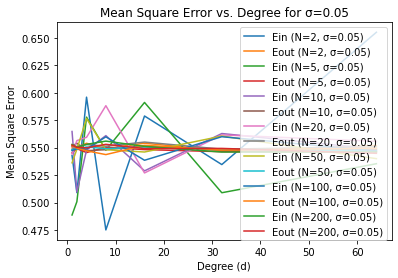

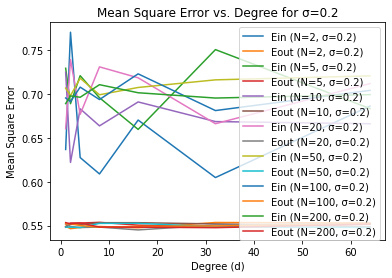

In [5]:
import matplotlib.pyplot as plt

# Define the parameters as per the instructions
Ns = [2, 5, 10, 20, 50, 100, 200]
degrees = [1, 2, 4, 8, 16, 32, 64]
sigmas = [0.05, 0.2]
M = 50  # Number of trials

# Run the experiment for all combinations of N, d, and sigma
for sigma in sigmas:
    for N in Ns:
        Ein_values = []
        Eout_values = []

        for degree in degrees:
            Ein_avg, Eout_avg = experiment(N, degree, sigma, M)
            Ein_values.append(Ein_avg)
            Eout_values.append(Eout_avg)

        # Plot Ein and Eout for the current sigma
        plt.plot(degrees, Ein_values, label=f'Ein (N={N}, σ={sigma})')
        plt.plot(degrees, Eout_values, label=f'Eout (N={N}, σ={sigma})')

    plt.xlabel('Degree (d)')
    plt.ylabel('Mean Square Error')
    plt.title(f'Mean Square Error vs. Degree for σ={sigma}')
    plt.legend()
    plt.show()


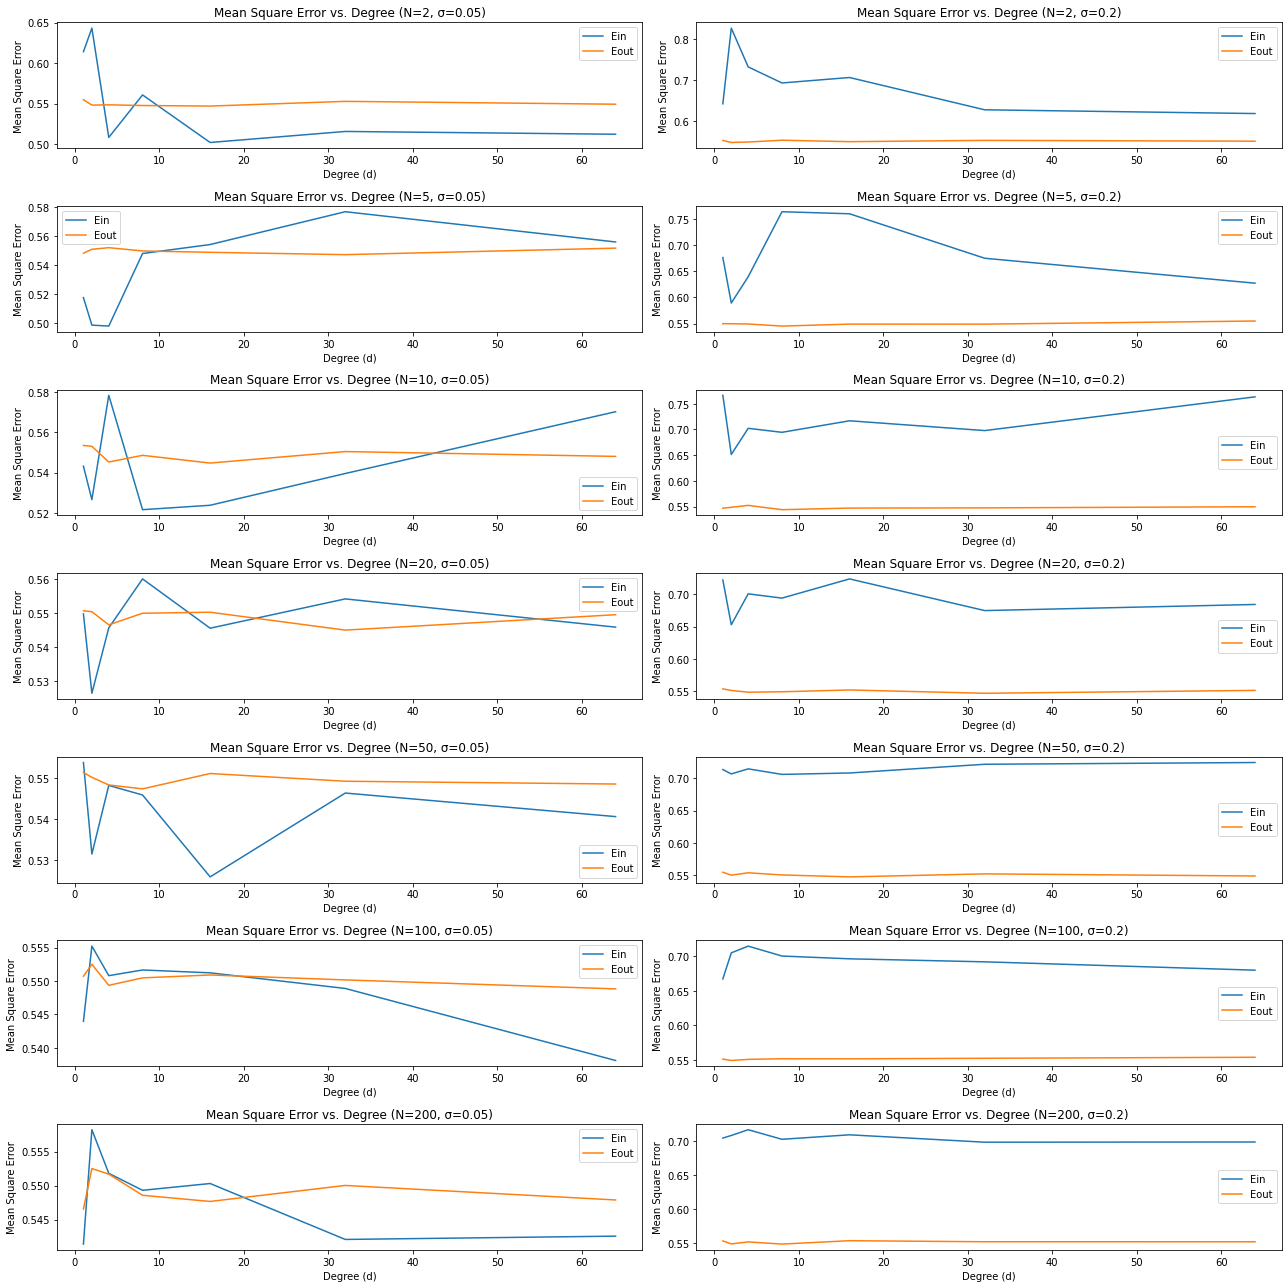

''

In [6]:
import matplotlib.pyplot as plt

# Define the parameters as per the instructions
Ns = [2, 5, 10, 20, 50, 100, 200]
degrees = [1, 2, 4, 8, 16, 32, 64]
sigmas = [0.05, 0.2]
M = 50  # Number of trials

# Initialize subplots
fig, axes = plt.subplots(nrows=len(Ns), ncols=len(sigmas), figsize=(18, 18))

for i, N in enumerate(Ns):
    for j, sigma in enumerate(sigmas):
        Ein_values = []
        Eout_values = []

        for degree in degrees:
            Ein_avg, Eout_avg = experiment(N, degree, sigma, M)
            Ein_values.append(Ein_avg)
            Eout_values.append(Eout_avg)

        # Plot Ein and Eout for the current sigma
        ax = axes[i, j]
        ax.plot(degrees, Ein_values, label=f'Ein')
        ax.plot(degrees, Eout_values, label=f'Eout')

        ax.set_xlabel('Degree (d)')
        ax.set_ylabel('Mean Square Error')
        ax.set_title(f'Mean Square Error vs. Degree (N={N}, σ={sigma})')
        ax.legend()

# Adjust layout and show plots
plt.tight_layout()
plt.show()
""

In [7]:
def fitData(X, Y, degree, lambda_reg, learning_rate=0.01, max_iterations=1000):
    # Create the design matrix
    design_matrix = np.column_stack([X**i for i in range(degree + 1)])

    # Placeholder for the coefficients (a0, a1, a2, ..., ad)
    coefficients = np.zeros(degree + 1)

    # Gradient Descent with L2 Regularization
    for _ in range(max_iterations):
        # Compute predicted values
        Y_pred = np.dot(design_matrix, coefficients)

        # Compute error
        error = Y_pred - Y

        # Compute gradients with regularization
        gradients = (2 / len(X)) * np.dot(design_matrix.T, error) + 2 * lambda_reg * coefficients

        # Update coefficients
        coefficients -= learning_rate * gradients

    # Compute Ein (mean square error on the training dataset)
    Y_pred_train = np.dot(design_matrix, coefficients)
    Ein = getMSE(Y, Y_pred_train)

    # Generate a separate testing dataset
    X_test, Y_test = getData(1000, 0.05)

    # Compute Eout (mean square error on the testing dataset)
    design_matrix_test = np.column_stack([X_test**i for i in range(degree + 1)])
    Y_pred_test = np.dot(design_matrix_test, coefficients)
    Eout = getMSE(Y_test, Y_pred_test)

    return coefficients, Ein, Eout


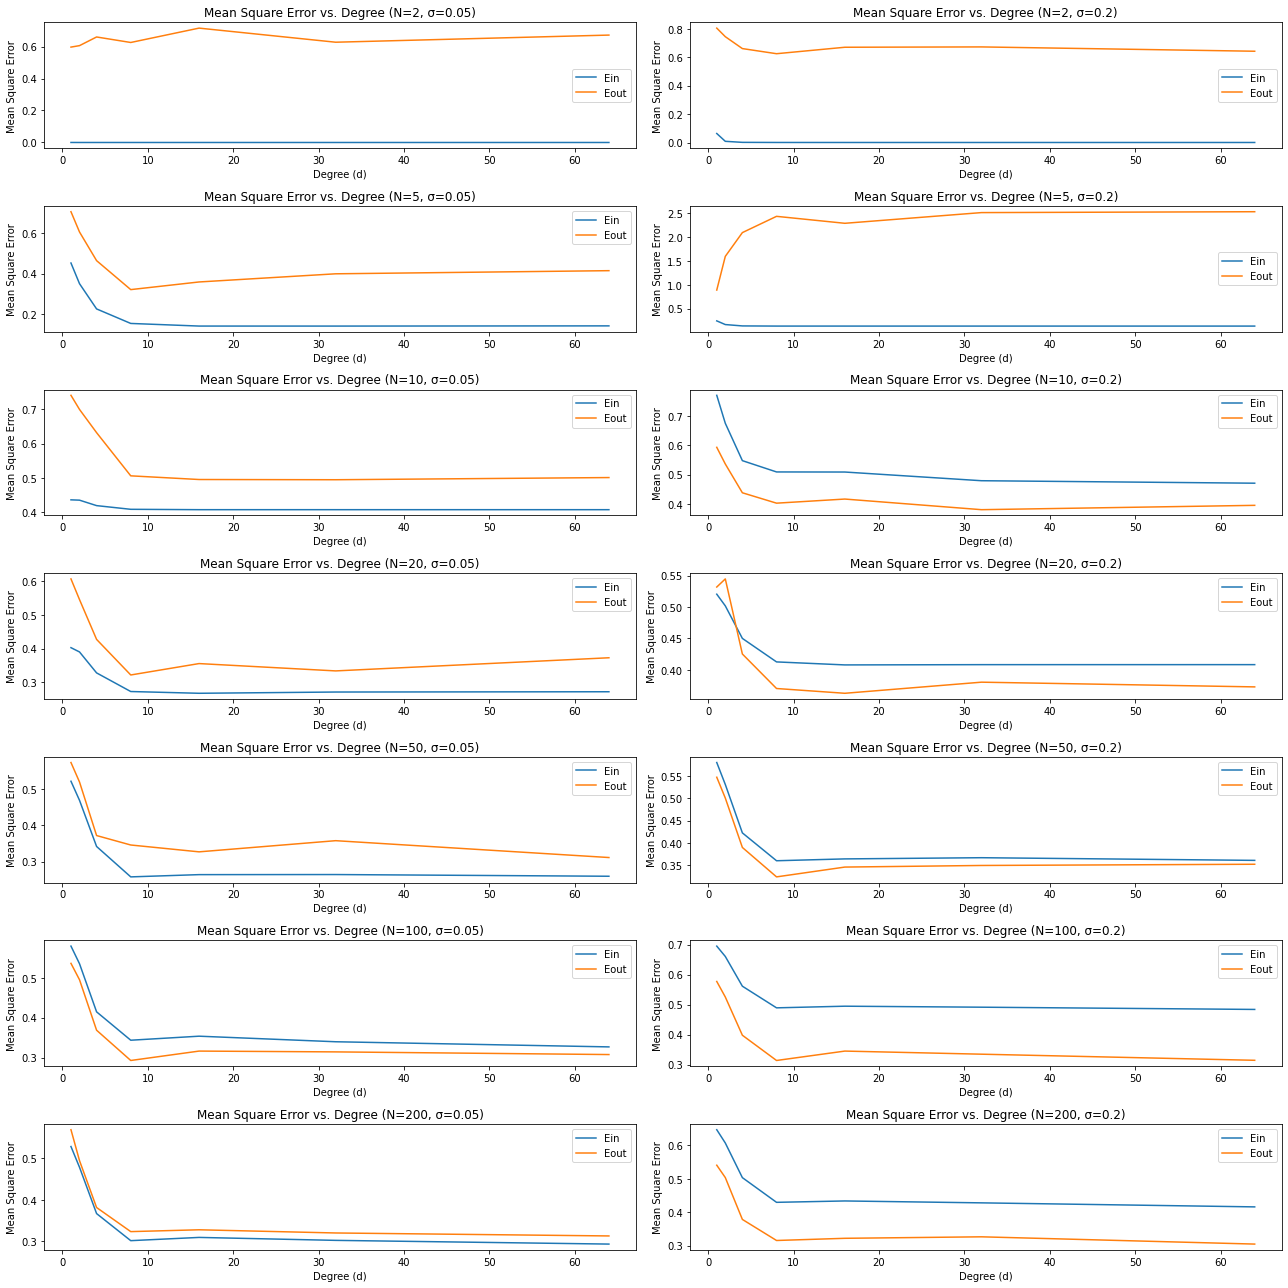

In [8]:
# Initialize subplots
fig, axes = plt.subplots(nrows=len(Ns), ncols=len(sigmas), figsize=(18, 18))

for i, N in enumerate(Ns):
    for j, sigma in enumerate(sigmas):
        Ein_values = []
        Eout_values = []

        # Generate data for this combination of N and sigma
        X, Y = getData(N, sigma)

        for degree in degrees:
            lambda_reg = 0.01  # Adjust regularization parameter as needed
            coefficients, Ein_avg, Eout_avg = fitData(X, Y, degree, lambda_reg)
            Ein_values.append(Ein_avg)
            Eout_values.append(Eout_avg)

        # Plot Ein and Eout for the current sigma
        ax = axes[i, j]
        ax.plot(degrees, Ein_values, label=f'Ein')
        ax.plot(degrees, Eout_values, label=f'Eout')

        ax.set_xlabel('Degree (d)')
        ax.set_ylabel('Mean Square Error')
        ax.set_title(f'Mean Square Error vs. Degree (N={N}, σ={sigma})')
        ax.legend()

# Adjust layout and show plots
plt.tight_layout()
plt.show()


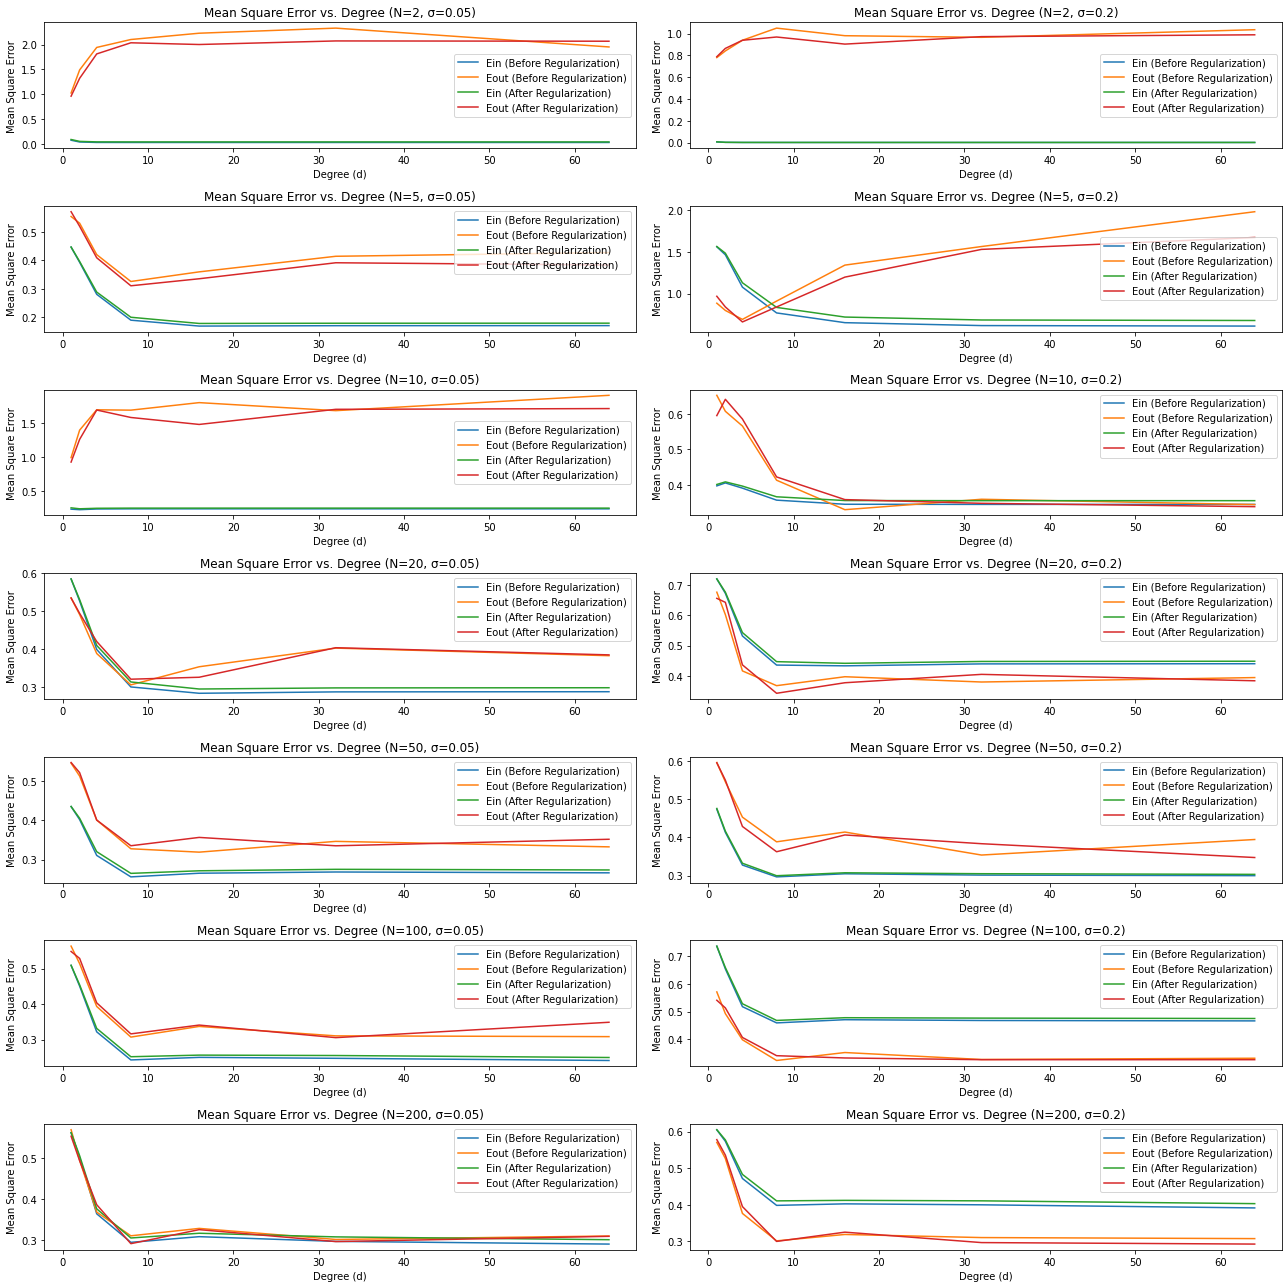

In [9]:
# Initialize subplots for comparison
fig, axes = plt.subplots(nrows=len(Ns), ncols=len(sigmas), figsize=(18, 18))

for i, N in enumerate(Ns):
    for j, sigma in enumerate(sigmas):
        Ein_values_before = []
        Eout_values_before = []
        Ein_values_after = []
        Eout_values_after = []

        # Generate data for this combination of N and sigma
        X, Y = getData(N, sigma)

        for degree in degrees:
            # Fit data without regularization (before)
            coefficients_before, Ein_avg_before, Eout_avg_before = fitData(X, Y, degree, 0.0)
            Ein_values_before.append(Ein_avg_before)
            Eout_values_before.append(Eout_avg_before)

            # Fit data with regularization (after)
            lambda_reg = 0.01  # Adjust regularization parameter as needed
            coefficients_after, Ein_avg_after, Eout_avg_after = fitData(X, Y, degree, lambda_reg)
            Ein_values_after.append(Ein_avg_after)
            Eout_values_after.append(Eout_avg_after)

        # Plot Ein and Eout for the current sigma
        ax = axes[i, j]
        ax.plot(degrees, Ein_values_before, label=f'Ein (Before Regularization)')
        ax.plot(degrees, Eout_values_before, label=f'Eout (Before Regularization)')
        ax.plot(degrees, Ein_values_after, label=f'Ein (After Regularization)')
        ax.plot(degrees, Eout_values_after, label=f'Eout (After Regularization)')

        ax.set_xlabel('Degree (d)')
        ax.set_ylabel('Mean Square Error')
        ax.set_title(f'Mean Square Error vs. Degree (N={N}, σ={sigma})')
        ax.legend()

# Adjust layout and show plots
plt.tight_layout()
plt.show()

In [10]:
def fitData(X, Y, degree, lambda_reg, learning_rate=0.01, max_iterations=1000):
    # Create the design matrix
    design_matrix = np.column_stack([X**i for i in range(degree + 1)])

    # Placeholder for the coefficients (a0, a1, a2, ..., ad)
    coefficients = np.zeros(degree + 1)

    # Gradient Descent with L2 Regularization
    for _ in range(max_iterations):
        # Compute predicted values
        Y_pred = np.dot(design_matrix, coefficients)

        # Compute error
        error = Y_pred - Y

        # Compute gradients with regularization
        gradients = (2 / len(X)) * np.dot(design_matrix.T, error) + 2 * lambda_reg * coefficients

        # Update coefficients
        coefficients -= learning_rate * gradients

    # Compute Ein (mean square error on the training dataset)
    Y_pred_train = np.dot(design_matrix, coefficients)
    Ein = getMSE(Y, Y_pred_train)

    # Generate a separate testing dataset
    X_test, Y_test = getData(1000, 0.05)

    # Compute Eout (mean square error on the testing dataset)
    design_matrix_test = np.column_stack([X_test**i for i in range(degree + 1)])
    Y_pred_test = np.dot(design_matrix_test, coefficients)
    Eout = getMSE(Y_test, Y_pred_test)

    return coefficients, Ein, Eout


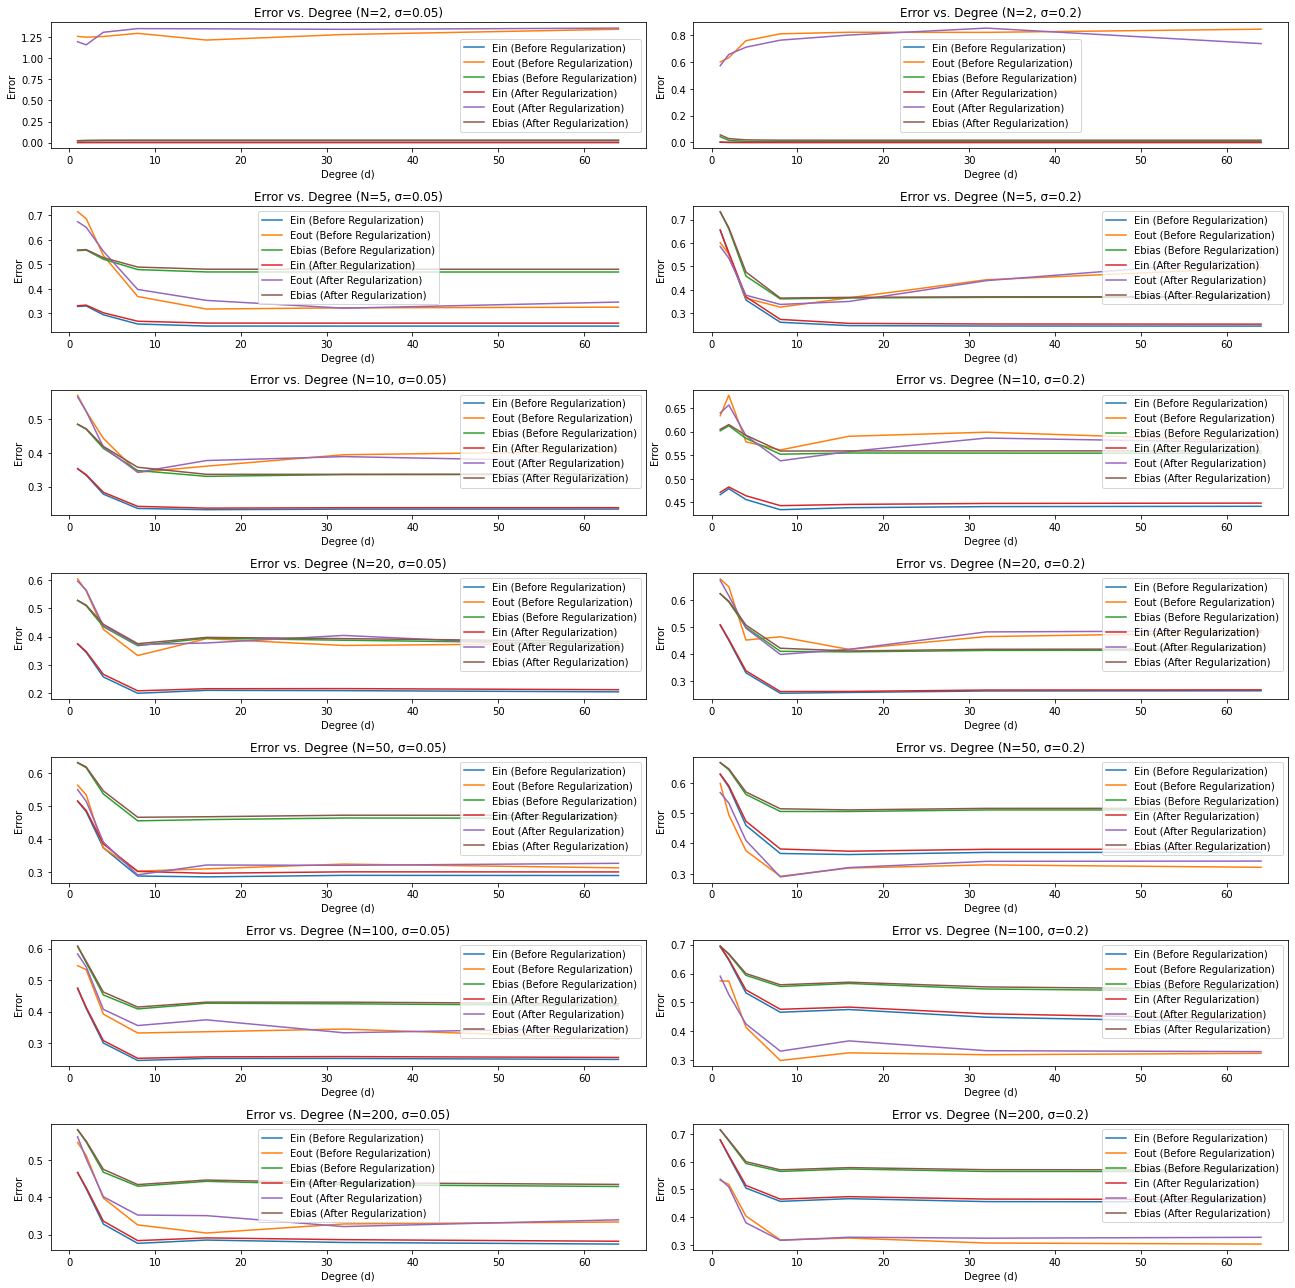

In [11]:
# Initialize subplots for comparison with Ebias
fig, axes = plt.subplots(nrows=len(Ns), ncols=len(sigmas), figsize=(18, 18))

for i, N in enumerate(Ns):
    for j, sigma in enumerate(sigmas):
        Ein_values_before = []
        Eout_values_before = []
        Ebias_values_before = []
        Ein_values_after = []
        Eout_values_after = []
        Ebias_values_after = []

        # Generate data for this combination of N and sigma
        X, Y = getData(N, sigma)

        for degree in degrees:
            # Fit data without regularization (before)
            coefficients_before, Ein_avg_before, Eout_avg_before = fitData(X, Y, degree, 0.0)
            Ein_values_before.append(Ein_avg_before)
            Eout_values_before.append(Eout_avg_before)
            Y_pred_before = np.dot(np.column_stack([X**i for i in range(degree + 1)]), coefficients_before)
            Ebias_values_before.append(np.mean(np.abs(Y_pred_before - Y)))  # Bias calculation

            # Fit data with regularization (after)
            lambda_reg = 0.01  # Adjust regularization parameter as needed
            coefficients_after, Ein_avg_after, Eout_avg_after = fitData(X, Y, degree, lambda_reg)
            Ein_values_after.append(Ein_avg_after)
            Eout_values_after.append(Eout_avg_after)
            Y_pred_after = np.dot(np.column_stack([X**i for i in range(degree + 1)]), coefficients_after)
            Ebias_values_after.append(np.mean(np.abs(Y_pred_after - Y)))  # Bias calculation

        # Plot Ein, Eout, and Ebias for the current sigma
        ax = axes[i, j]
        ax.plot(degrees, Ein_values_before, label=f'Ein (Before Regularization)')
        ax.plot(degrees, Eout_values_before, label=f'Eout (Before Regularization)')
        ax.plot(degrees, Ebias_values_before, label=f'Ebias (Before Regularization)')
        ax.plot(degrees, Ein_values_after, label=f'Ein (After Regularization)')
        ax.plot(degrees, Eout_values_after, label=f'Eout (After Regularization)')
        ax.plot(degrees, Ebias_values_after, label=f'Ebias (After Regularization)')

        ax.set_xlabel('Degree (d)')
        ax.set_ylabel('Error')
        ax.set_title(f'Error vs. Degree (N={N}, σ={sigma})')
        ax.legend()

# Adjust layout and show plots
plt.tight_layout()
plt.show()